### Use SVC image classifier for multiple categories for cifar10

In [3]:
import pandas as pd 
import numpy as np
# from skimage.transform import resize 
# from skimage.io import imread 
import matplotlib.pyplot as plt 
# from sklearn.model_selection import GridSearchCV
import joblib
from keras.datasets import cifar10

In [2]:
model = joblib.load('svc_classifier.pkl')

In [6]:
categories=['airplane','automobile'] 

In [5]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

subset_testX = testX[np.isin(testy, [0,1]).flatten()]
subset_testy = testy[np.isin(testy, [0,1]).flatten()]

# Shuffle first (optional)
idx = np.arange(len(subset_testX))
np.random.shuffle(idx)
# get first 1% of data
subset_testX = subset_testX[:int(.01*len(idx))]
subset_testy = subset_testy[:int(.01*len(idx))]

# summarize loaded dataset
print('Test: X=%s, y=%s' % (subset_testX.shape, subset_testy.shape))

Test: X=(20, 32, 32, 3), y=(20, 1)


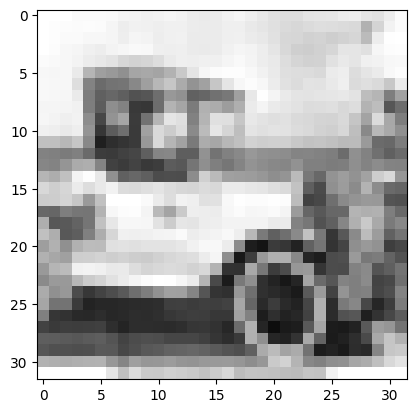

In [18]:
img=subset_testX[6]
plt.imshow(img) 
plt.show() 

In [19]:
# img_resize=resize(img,(150,150,3)) 
l=[img.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(categories): 
	print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[model.predict(l)[0]])

airplane = 56.237462001161234%
automobile = 43.76253799883876%
The predicted image is : airplane
